In [36]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# If the tf.__version__ is 1.x, please run this cell
#!pip install --upgrade --ignore-installed tensorflow

In [38]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
# Get the data
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [0]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [0]:
vocab_size = 5000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           80000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 91,149
Trainable params: 91,149
Non-trainable params: 0
_________________________________________________________________


In [43]:
NUM_EPOCHS = 20
history = model.fit(padded, training_labels_final, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 334us/sample - loss: 0.4446 - accuracy: 0.7866 - val_loss: 0.3478 - val_accuracy: 0.8490
Epoch 2/20
25000/25000 [==============================] - 8s 309us/sample - loss: 0.3152 - accuracy: 0.8673 - val_loss: 0.3473 - val_accuracy: 0.8465
Epoch 3/20
25000/25000 [==============================] - 8s 309us/sample - loss: 0.2819 - accuracy: 0.8833 - val_loss: 0.3535 - val_accuracy: 0.8444
Epoch 4/20
25000/25000 [==============================] - 8s 313us/sample - loss: 0.2565 - accuracy: 0.8959 - val_loss: 0.3618 - val_accuracy: 0.8392
Epoch 5/20
25000/25000 [==============================] - 8s 308us/sample - loss: 0.2353 - accuracy: 0.9061 - val_loss: 0.3889 - val_accuracy: 0.8349
Epoch 6/20
25000/25000 [==============================] - 8s 308us/sample - loss: 0.2160 - accuracy: 0.9171 - val_loss: 0.3987 - val_accuracy: 0.8332
Epoch 7/20
25000/25000 [==========================

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

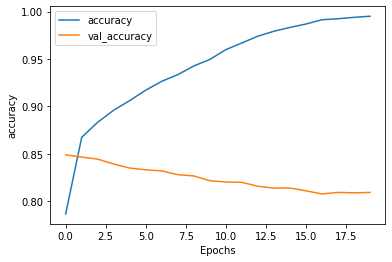

In [45]:
plot_graphs(history, 'accuracy')

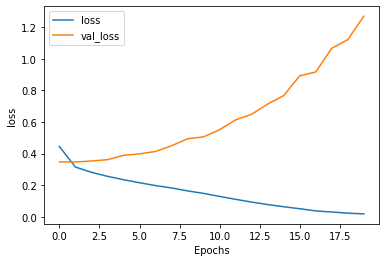

In [46]:
plot_graphs(history, 'loss')